#### utility functions

In [1]:
import numpy as np

def superimshow(
    data: list | np.ndarray,
    nrows: int = None,
    ncols: int = None,
    titles: list | str = None,
    xlabels: list | str = None,
    ylabels: list | str = None,
    *mplargs,
    **mplkwargs,
):
    """
    Display multiple images in a single figure.

    Parameters
    ----------
    data : list or array-like
        List of 2D arrays or a cube of images (3D array of shape `(npx, npx, nimg)`).
    nrows : int, optional
        Number of rows in the figure.
    ncols : int, optional
        Number of columns in the figure.
    titles : list or str, optional
        List of titles for each image. If not provided, the titles are the index of the image.
    xlabels : list or str, optional
        List of x-axis labels for each image. If not provided, the labels are 'x'.
    ylabels : list or str, optional
        List of y-axis labels for each image. If not provided, the labels are 'y'.
    *mplargs
        Additional arguments to be passed to `imshow`.
    **mplkwargs
        Additional keyword arguments to be passed to `imshow`.
    """
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    if not isinstance(data, np.ndarray):
        data = np.ma.dstack(data)
    Nplots = data.shape[-1]
    titles = (
        [f"{i}" for i in range(Nplots)]
        if titles is None
        else titles * Nplots if isinstance(titles, str) else titles
    )
    xlabel = (
        ["x"] * Nplots
        if xlabels is None
        else xlabels * Nplots if isinstance(xlabels, str) else xlabels
    )
    ylabel = (
        ["y"] * Nplots
        if ylabels is None
        else ylabels * Nplots if isinstance(ylabels, str) else ylabels
    )
    ncol = int(np.ceil(np.sqrt(Nplots))) if ncols is None else ncols
    nrow = int(np.ceil(Nplots / ncol)) if nrows is None else nrows
    if (nrow * ncol) < Nplots:
        raise ValueError(
            f"Number of rows and columns is not enough to display {Nplots} images."
        )
    fig, axs = plt.subplots(nrow, ncol, figsize=(16, 9))
    # rendiamo ax un array per consistenza
    if isinstance(axs, plt.Axes):
        axs = np.array([axs])
    # "Appiattiamo" l'array di assi per iterare in modo lineare
    axs = axs.ravel()
    # Cicliamo su ogni immagine fino a esaurirle
    for i in range(Nplots):
        ax = axs[i]
        # Creiamo la colormap e la colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        # Plot dell'immagine
        im = ax.imshow(data[..., i], *mplargs, **mplkwargs)
        ax.set_title(titles[i])
        ax.set_xlabel(xlabel[i])
        ax.set_ylabel(ylabel[i])
        ax.set_aspect("equal")
        # Aggiunta del colorbar
        fig.colorbar(im, cax=cax)
    # Se rimangono assi vuoti, li spegniamo
    for j in range(Nplots, len(axs)):
        axs[j].axis("off")
    fig.tight_layout()
    plt.show()


#### Configuration File for OTT

```yaml
SYSTEM:
  data_path: '/mnt/m4storage/Data/M4Data'
  simulated.devices:
    dm: False
    interferometer: False
    accelerometers: True
    angleRotator: True
    m4Exapode: True
    dp: False
    parSlider: False
    par: False
    rmSlider: False
    rm: False
    tempSensors: False

DEVICES:
  INTERFEROMETER:
    PhaseCam6110:
      ip: "192.168.22.78"
      port: 8011
      Paths:
        produce: "/home/m4/Shared4DFolders/PC6110Data/M4/Produced"
        settings: "/home/m4/Shared4DFolders/PC6110Config/AppSettings.ini"
        copied_settings: '4DSettings.ini'
        capture_4dpc: "D:/M4/Capture"
        produce_4dpc: "D:/M4/Produced"

  DEFORMABLE.MIRRORS:
    AlpaoXXX:
      ip:
      port:
      diameter:
    Splatt:
      ip: '193.206.155.220'
      port: 9090
  CAMERAS:
    SPLCam0:
      ip: '10.0.0.3'
      id: 'DEV_000F314DE425'

INFLUENCE.FUNCTIONS:
  DM:
    nacts: 222
    timing: 1
    delay: 0.0
  TRIGGER:
    numberofzeros: 0
    modeid: []
    modeamp: 50e-9
    template: []
    modalbase: hadamard
  REGISTRATION:
    numberofzeros: 0
    modeid: []
    modeamp: 50e-9
    template: []
    modalbase: zonal
  IFFUNC:
    numberofzeros: 0
    modeid: np.arange(0,222,1)
    modeamp: 100e-9
    template: [1, -1, 1]
    modalbase: hadamard

STITCHING:
  pixel_scale: 0.09095 # mm/px
  alpha: 0 # degrees
  starting_coords: [0, 0] # motors position in mm
  home_coords: [0, 0] # motors position in mm

# Filled, as example, with M4 OTT configuration
SYSTEM.ALIGNMENT:
  names:
  - 'Parabola'
  - 'Reference Mirror'
  - 'DP Motors'

  devices_move_calls:
  - 'parabola.setPosition'
  - 'referenceMirror.setPosition'
  - 'dp.setPosition'

  devices_read_calls:
  - 'parabola.getPosition'
  - 'referenceMirror.getPosition'
#  - 'dp.getPosition'

  ccd_acquisition:
  - 'acquireFullFrame'

  devices_dof: 6

  dof:
  - [2, 3, 4]        # Parabola DoF
  - [3, 4]           # Reference Mirror DoF
  - [3, 4]           # M4 Exapode DoF

  slices:
    # Parabola
  - start: 0
    stop: 3
    # Reference Mirror
  - start: 3
    stop: 5
    # M4 Exapode
  - start: 5
    stop: 7

  zernike_to_use: [1, 2, 3, 6, 7]
  push_pull_template: [1, -2, 1]
  commandMatrix: ottCmdMat.fits
  fitting_surface: '/mnt/m4storage/Data/M4Data/OPTData/ParabolaRemapped/20240521_161525/par_remapped.fits'
```

[Documentation Here](https://github.com/pietroferraiuolo/labott/blob/main/opticalib/core/_configurations/DOCS.md)

# `OPTICALIB` Tutorial

`opticalib` is a python package for automated procedures on deformable mirrors, interferometers and other laboratory devices, with built-in tools for data analysis. 

It's framework is based on a **configuration** file (`configuration.yaml`). The package creates a CLI function, named `calpy` with the following options:

```plain
CALPY DOCUMENTATION
`calpy` is a command-line tool that calls an interactive Python 
shell (IPython) with the option to pass the path to a configuration
file for the `opticalib` package.

Options:
--------
no option : Initialize an IPython --pylab shell

-f <path> : Option to pass the path to a configuration file to be read 
            (e.g., '../opticalibConf/configuration.yaml'). Used to initiate
            the opticalib package.

-f <path> --create : Create the configuration file in the specified path, 
                     as well as the complete data folder tree, and enters 
                     an ipython session importing opticalib. The created
                     configuration file is already updated with the provided
                     data path.

-c <path> : Create the configuration file in the specified path, as well as 
            the complete  data folder tree, and exit. The created
            configuration file is already updated with the provided
            data path.

-h |--help : Shows this help message
```

An experiment can be easily set up with the `opticalib` package, by just openin a terminal and running the calpy program:

```bash
calpy -f .../path/to/experiment --create
```

This command will automatically create a configuration file in the path .../path/to/experimnent/**SysConf/configuration.yaml** and initialize an IPython session with `opticalib` imported and all paths correctly setup.

For the sake of this tutorial, which is on a Jupyter Notebook and not on an ipython shell, and in general if you like to work on notebooks, the workaround for making `calpy` work, is running these 2 lines as the first thing in your notebook:

```python
import os
os.environ['AOCONF']='.../path/to/experiment/SysConf/configuration.yaml'
```

From then on, importing opticalib will have the configuration file correctly set up and running

## Initialization (notebook only)

In [ ]:
import os
os.environ['AOCONF'] = '/mnt/m4storage/Data/M4Data/SysConfig/configuration.yaml'

## Data Analysis

The main modules you will likely use for data analysis are:

- `ground.osutils` : This module provides all useful functions for files and folders management
- `analyzers` : The main module of data analysis, with some useful functions
- `dmutils.iff_processing` : A module specialized in Infulence Functions data processing
- `ground.zernike` : With the `ZernikeFitter` class, a module tailored ad zernike fitting



Now, let's make some example on some data, in particular the IFF for the first shell of the DP

```python 
   tn='20250911_110652' 
```

In [3]:
import opticalib as opt
from opticalib.ground import osutils as osu
from opticalib import analyzer
from opticalib.dmutils import iff_processing as ifp
from opticalib.ground import zernike as zern

tn = '20250911_110656'


[XuPy] GPU Acceleration unavailable.
       Using CPU (NumPy).


### File Handling

Retrieve the file list within the TN data folder, located in the OPDImages folder

This is automatically handled, but let's do it manually step-by-step

In [4]:
folders = osu.findTracknum(tn)
print(folders)

['IFFunctions', 'INTMatrices', 'OPDImages']


Automatically, `getFileList` will return the file list inside the `OPDImages/{tn}` folder, but we can specify the folder to look in. 

Also, you can see that the last item of the list is not a `.4D` file (image) but `4DSettings.ini`. This can be avoided by specifying the `key` argument

In [5]:
print('\nFile list within the TN data folder:')
filelist = osu.getFileList(tn)
[print(x) for x in filelist[0:5]]
print('...')
print(filelist[-1])

print("\nSpecifying the `fold` argument:\n")
filelist = osu.getFileList(tn, fold='IFFunctions')
[print(x) for x in filelist[0:5]]
print('...')
print(filelist[-1])

print("\nSpecifying the `key` argument to filter `.4D` files:\n")

filelist = osu.getFileList(tn, key='.4D')
[print(x) for x in filelist[0:5]]
print('...')
print(filelist[-1])


File list within the TN data folder:
/mnt/m4storage/Data/M4Data/OPTData/OPDImages/20250911_110656/00000.4D
/mnt/m4storage/Data/M4Data/OPTData/OPDImages/20250911_110656/00001.4D
/mnt/m4storage/Data/M4Data/OPTData/OPDImages/20250911_110656/00002.4D
/mnt/m4storage/Data/M4Data/OPTData/OPDImages/20250911_110656/00003.4D
/mnt/m4storage/Data/M4Data/OPTData/OPDImages/20250911_110656/00004.4D
...
/mnt/m4storage/Data/M4Data/OPTData/OPDImages/20250911_110656/4DSettings.ini

Specifying the `fold` argument:

/mnt/m4storage/Data/M4Data/OPTData/IFFunctions/20250911_110656/ampVector.fits
/mnt/m4storage/Data/M4Data/OPTData/IFFunctions/20250911_110656/cmdMatrix.fits
/mnt/m4storage/Data/M4Data/OPTData/IFFunctions/20250911_110656/iffConfig.yaml
/mnt/m4storage/Data/M4Data/OPTData/IFFunctions/20250911_110656/indexList.fits
/mnt/m4storage/Data/M4Data/OPTData/IFFunctions/20250911_110656/mode_0000.fits
...
/mnt/m4storage/Data/M4Data/OPTData/IFFunctions/20250911_110656/timedCmdHistory.fits

Specifying the `key

### Iff Processing

We have all the images in this Tracking Number, which are raw acquisition of the DP 1st shell Influence Function. Let's process those.

Since the data was taken with `opticalib.dmutils.iff_module.iffDataAcquisition`, all the additional information needed for the processing are automatically handled

In [6]:
ifp.process(tn=tn, save=False, rebin=2, nworkers=16, nmode_prefetch=4)
# save = True is equivalent to `ifp.saveCube`, but doing False here to get the Cube directly
# `nworkers` and `nmode_prefetch` are advanced parameters for parallel processing

cube = ifp.saveCube(tn=tn)
print(cube.shape)

Trigger threshold: 5.77e-07
Frame 0: std = 3.94e-07
Frame 1: std = 4.73e-07
Frame 2: std = 8.22e-09
Frame 3: std = 6.81e-07
↑ Trigger Frame found!


Processing...: 100%|███████████████████████| 111/111 [00:27<00:00,  3.97modes/s]


Cube of shape (2000, 2000, 111) saved in '.../20250911_110656/IMCube.fits'
(2000, 2000, 111)


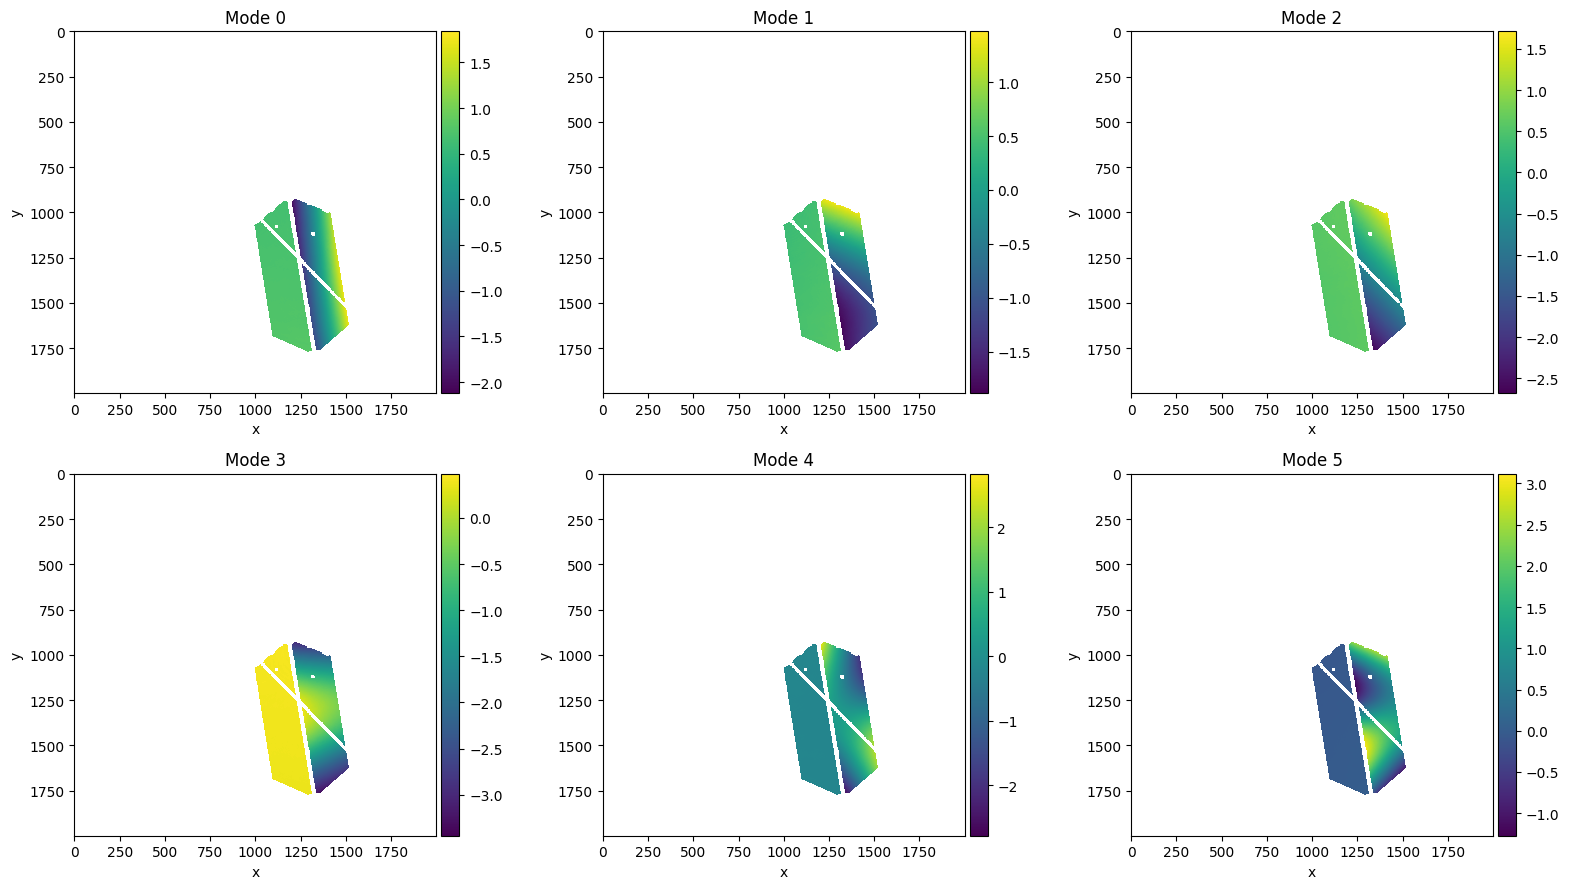

In [7]:
superimshow(cube[:,:,:6], origin='upper', titles=['Mode '+str(i) for i in range(6)])

### Fitting and removing Zernike Modes

As of the new version of `opticalib`, the zernike library has changed, in favor of a Class (of course).

The difference is that you only need to instance it, with or without a fitting mask

Let's fit PTT [1,2,3] on the same 6 images as above and look at them

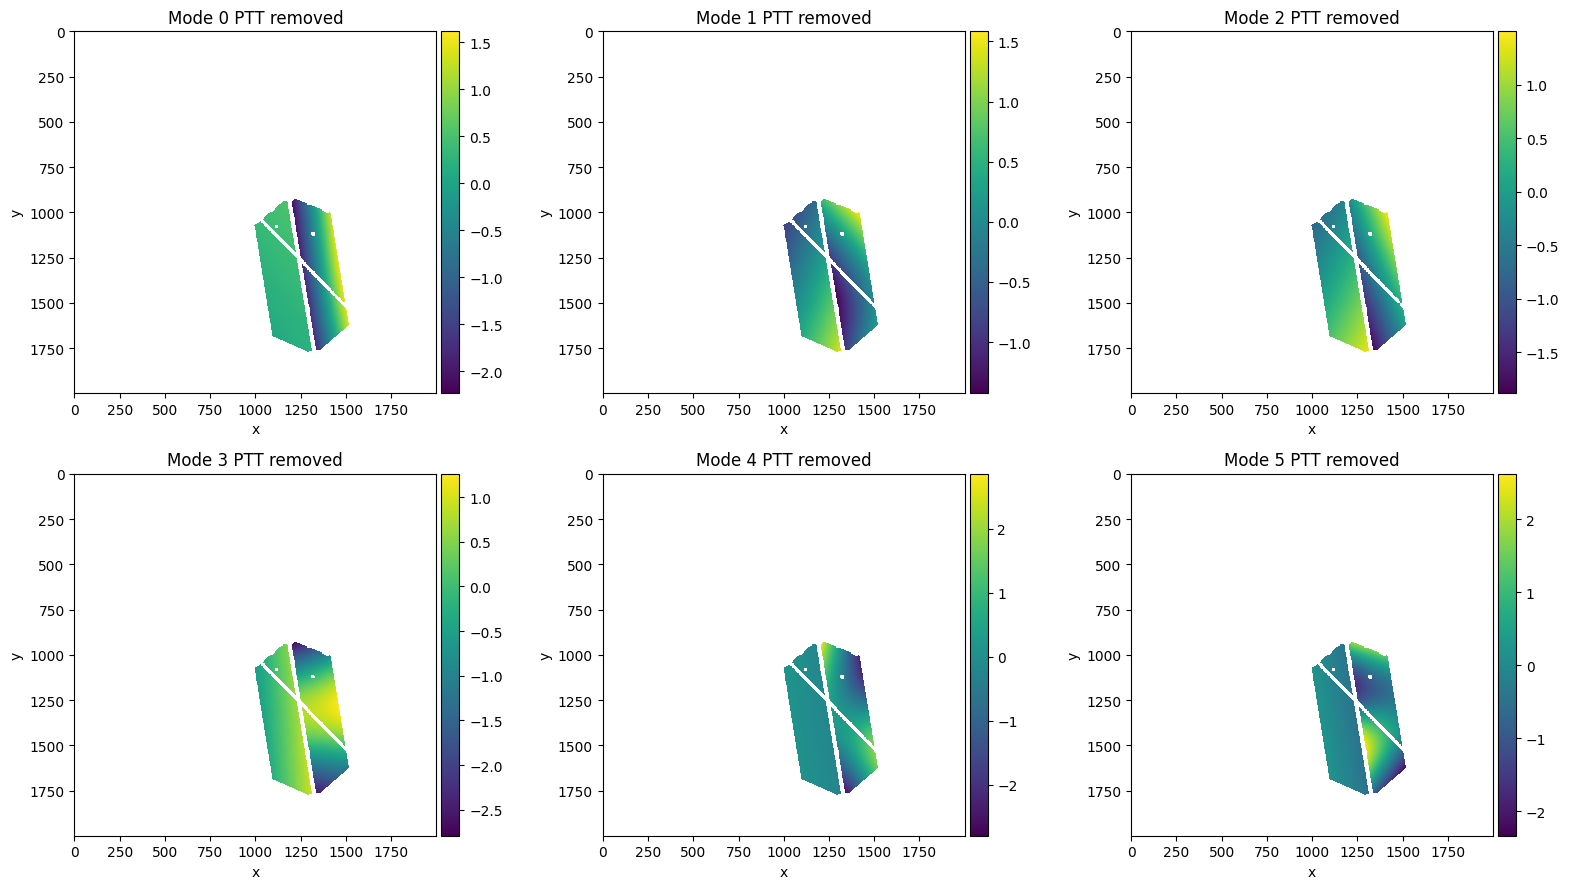

In [8]:
zfitter = zern.ZernikeFitter() # This is without a fitting mask, i.e. the fitter will use the image's mask

fitted_images = []
for i in range(6):
    fitted_images.append(zfitter.removeZernike(cube[:,:,i], zernike_index_vector=[1,2,3]))

superimshow(fitted_images, origin='upper', titles=['Mode '+str(i)+' PTT removed' for i in range(6)])
    

When working with cubes, there is a function which filters the whole cube

In [9]:
ncube, _ = ifp.filterZernikeCube(tn, [1,2,3], save=False) # This is used inside the flattening class, but WIP for abstraction, so don't mind the underscore and the `tn` to be passed

Removing Z[1, 2, 3]...:   0%|                        | 0/111 [00:00<?, ?image/s]

Removing Z[1, 2, 3]...: 100%|██████████████| 111/111 [01:00<00:00,  1.85image/s]


## Hardware interfaces

Opticalib creates an easy interface with laboratory instrumentation, such as DMs, interferometers and cameras (for now). The `opticalib.devices` module contains:

- `deformable_mirrors` : module in which are defined the deformable mirrors (`AdOpticaDm`, `AlpaoDm`, `SplattDm`)
- `interferometers` : as it says. For now only 4d Interferometers (`AccuFiz`, `PhaseCam`)
- `cameras` : Generic cameras for acquisitions. For now only the ATV gamera of the SPL (as a general class`VimbaXCam`, which uses the `vmbpy` api)

The requirement for the devices to work is that they are defined in the configuration file with the correct model name. An example can be done with the interferometer.

The interferometer of the OTT, as example, is defined in the configuration file as:

```yaml
DEVICES:
  INTERFEROMETER:
    PhaseCam6110:
      ip: "192.168.22.78"
      port: 8011
      Paths:
        produce: "/home/m4/Shared4DFolders/PC6110Data/M4/Produced"
        settings: "/home/m4/Shared4DFolders/PC6110Config/AppSettings.ini"
        copied_settings: '4DSettings.ini'
        capture_4dpc: "D:/M4/Capture"
        produce_4dpc: "D:/M4/Produced"

```

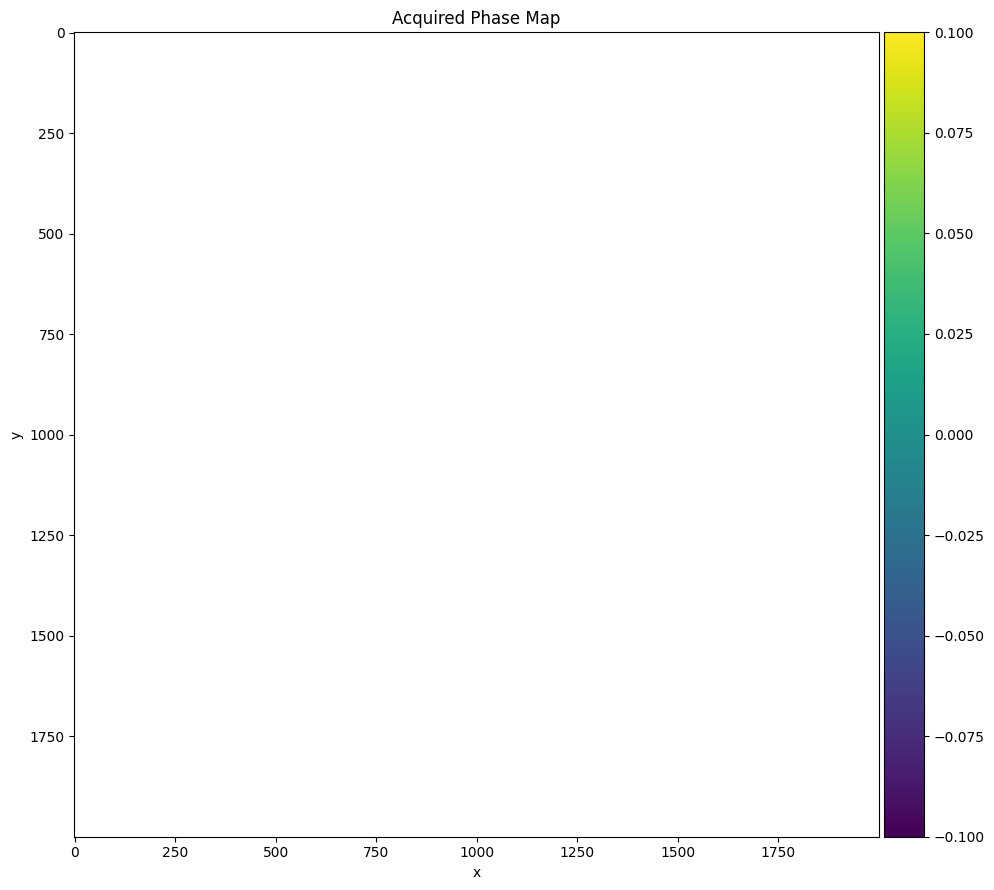

In [10]:
interf = opt.PhaseCam(6110)

image = interf.acquire_map(1)

superimshow([image], origin='upper', titles=['Acquired Phase Map'])